## Step 1: Webscraping using Beautiful Soup 

### Webscraped stock news for NVDIA and Amazon stock and created a list that would store the time stamp, date and the title (headlines) for that specific stock. This will be further used to perform sentimental Analysis. 

In [37]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import requests
import random
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [53]:
import random
import requests

# Base URL for the Finviz stock quote page
url = "https://finviz.com/quote.ashx?t="

# List of user-agent strings to mimic browser requests
user_agent_list = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.111 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9",
    "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15.0) Gecko/20100101 Firefox/15.0.1",
    "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36"
]

# Headers to include in the request
headers = {
    'User-Agent': random.choice(user_agent_list)
}

# List of stock ticker symbols
stock_symbols = ["AMZN", "NVDA"]

# Making the GET request for each stock symbol
#Creating a dictionary that stores the relevant table with all the news 

news_tables= {}
for stock in stock_symbols:
    full_url = url + stock
    response = requests.get(full_url, headers=headers)
    
    # Print the response status code to verify the request
    print(f"Response for {stock}: {response.status_code}")
    # Optionally, print the content of the response
    #print(response.text)
    html = BeautifulSoup(response.text, 'html.parser')
    news_table = html.find(id = 'news-table')
    news_tables[stock]= news_table
    #print(html.prettify())
    
    break  # Remove this line if you want to process all stock symbols


Response for AMZN: 200


In [55]:
NVDA_data = news_tables['AMZN']
NVDA_rows = NVDA_data.findAll('tr')

for index, row in enumerate(NVDA_rows):
    title = row.a.text
    timestamp = row.td.text
    print(timestamp + " " + title)


            Today 03:30PM
         Why Amazon Stock Popped on Wednesday

            03:27PM
         Amazon crosses $2 trillion in stock market value for the first time

            03:19PM
         Nvidia's Blackwell Could Be 'Most Successful Product' in History, CEO Jensen Huang Says

            03:06PM
         Google pulls ahead of Amazon in robotaxi race

            02:52PM
         Amazon Plans Discount Web Store in Effort to Counter Temu, Shein

            02:34PM
         You've Been Warned! 7 Tech Stocks to Buy Now or Regret Forever.

            02:27PM
         The Only 3 Enterprise AI Stocks Investors Need

            02:18PM
         Amazons Market Cap Crosses $2 Trillion as Tech Stocks Keep Surging

            02:00PM
         How will Amazon compete in AI chips?

            01:59PM
         Amazon reaches $2 trillion market cap for the first time

            01:55PM
         Amazon to launch discount section with direct shipping from China, the Information repor

In [56]:
#creating a list inside a list that takes the title, date and time of the news and adds it to the list for all the stocks in the list.


parsed_data = []

for stock, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.get_text()
        date_data = row.td.text.strip().split(' ')
        if len(date_data) == 1:
            time = date_data[0]
            date = 'Unknown'
        else:
            date = date_data[0]
            time = date_data[1]
        
        parsed_data.append([stock, date, time, title])

parsed_data
        
    

[['AMZN', 'Today', '03:30PM', 'Why Amazon Stock Popped on Wednesday'],
 ['AMZN',
  'Unknown',
  '03:27PM',
  'Amazon crosses $2 trillion in stock market value for the first time'],
 ['AMZN',
  'Unknown',
  '03:19PM',
  "Nvidia's Blackwell Could Be 'Most Successful Product' in History, CEO Jensen Huang Says"],
 ['AMZN',
  'Unknown',
  '03:06PM',
  'Google pulls ahead of Amazon in robotaxi race'],
 ['AMZN',
  'Unknown',
  '02:52PM',
  'Amazon Plans Discount Web Store in Effort to Counter Temu, Shein'],
 ['AMZN',
  'Unknown',
  '02:34PM',
  "You've Been Warned! 7 Tech Stocks to Buy Now or Regret Forever."],
 ['AMZN',
  'Unknown',
  '02:27PM',
  'The Only 3 Enterprise AI Stocks Investors Need'],
 ['AMZN',
  'Unknown',
  '02:18PM',
  'Amazons Market Cap Crosses $2 Trillion as Tech Stocks Keep Surging'],
 ['AMZN', 'Unknown', '02:00PM', 'How will Amazon compete in AI chips?'],
 ['AMZN',
  'Unknown',
  '01:59PM',
  'Amazon reaches $2 trillion market cap for the first time'],
 ['AMZN',
  'Unkno

## Using NLTK Vader for Sentimental Analysis

### Using the parsed_data list that we created, we will perform sentimental analysis on current market sentiments for NVDA and AMZN stock

In [16]:
pip install nltk

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [20]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/akshitakhajuria/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [57]:
#Creating a dataframe to keep our data 

df = pd.DataFrame(parsed_data, columns = ['stock_symbol', 'date', 'time' , 'title'])
print(df.head())

  stock_symbol     date     time  \
0         AMZN    Today  03:30PM   
1         AMZN  Unknown  03:27PM   
2         AMZN  Unknown  03:19PM   
3         AMZN  Unknown  03:06PM   
4         AMZN  Unknown  02:52PM   

                                               title  
0               Why Amazon Stock Popped on Wednesday  
1  Amazon crosses $2 trillion in stock market val...  
2  Nvidia's Blackwell Could Be 'Most Successful P...  
3      Google pulls ahead of Amazon in robotaxi race  
4  Amazon Plans Discount Web Store in Effort to C...  


In [62]:
#Initialize VADER which will conduct sentiment analysis

vader = SentimentIntensityAnalyzer()

#print(vader.polarity_scores('NVDA stock is a good stock!'))

In [64]:
#print(df['title'])

vader = SentimentIntensityAnalyzer()
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)



#df['date'] = pd.to_datetime(df.date).dt.date

print(df[70:])

   stock_symbol       date     time  \
70         AMZN    Unknown  01:37PM   
71         AMZN    Unknown  11:57AM   
72         AMZN    Unknown  10:01AM   
73         AMZN    Unknown  10:00AM   
74         AMZN    Unknown  10:00AM   
75         AMZN    Unknown  09:30AM   
76         AMZN    Unknown  09:00AM   
77         AMZN    Unknown  09:00AM   
78         AMZN    Unknown  09:00AM   
79         AMZN    Unknown  08:48AM   
80         AMZN    Unknown  07:30AM   
81         AMZN    Unknown  07:00AM   
82         AMZN    Unknown  06:35AM   
83         AMZN    Unknown  06:20AM   
84         AMZN    Unknown  06:05AM   
85         AMZN    Unknown  05:18AM   
86         AMZN    Unknown  05:10AM   
87         AMZN    Unknown  04:24AM   
88         AMZN    Unknown  03:50AM   
89         AMZN  Jun-23-24  09:30AM   
90         AMZN    Unknown  09:04AM   
91         AMZN    Unknown  09:00AM   
92         AMZN    Unknown  08:00AM   
93         AMZN    Unknown  07:30AM   
94         AMZN    Unknow

In [71]:
# Grouping by date and calculating the mean of the compound scores
mean_sentiments = df.groupby('date')['compound'].mean().reset_index()

# Renaming columns for clarity
mean_sentiments.columns = ['date', 'average_sentiment']

# Display the result
print(mean_sentiments)


        date  average_sentiment
0  Jun-23-24          -0.599400
1  Jun-24-24           0.526700
2  Jun-25-24           0.557400
3      Today           0.177900
4    Unknown           0.223527


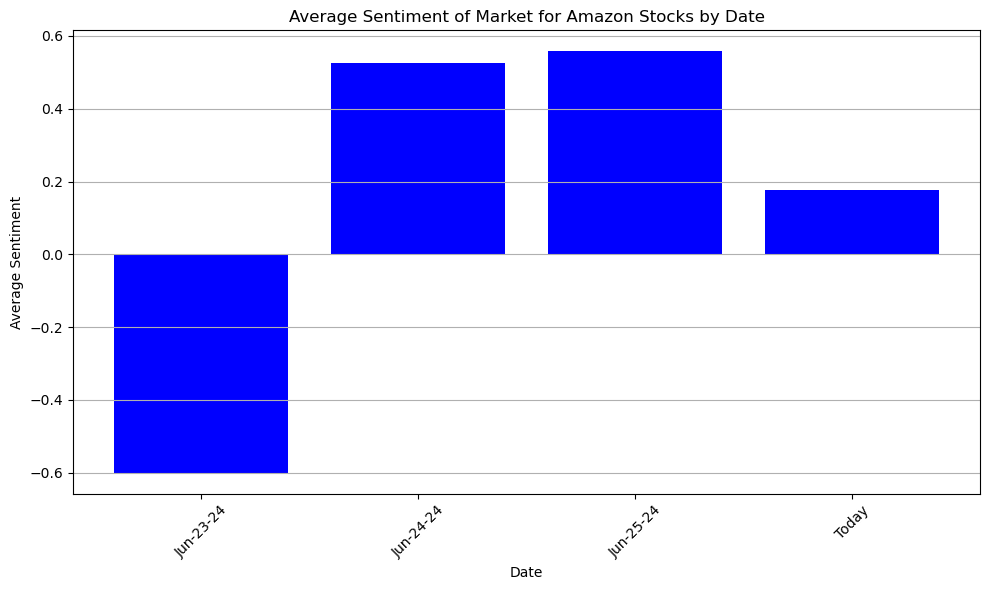

In [75]:
#Visualization of Sentimental Analysis

# Removing rows with 'Unknown' date
mean_sentiments = mean_sentiments[mean_sentiments['date'] != 'Unknown']

# Plotting the average sentiment
plt.figure(figsize=(10, 6))
plt.bar(mean_sentiments['date'], mean_sentiments['average_sentiment'], color='b')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment of Market for Amazon Stocks by Date')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()

# Display the plot
plt.show()